In [1]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt

from extra_data import open_run, RunDirectory, H5File
from extra_data.read_machinery import find_proposal

import sys
sys.path.append('../src')

from dffc.constants import (
    process_dark, process_flat, process_flat_orig,
    process_flat_linear, write_constants
)
from dffc.draw import plot_images

In [2]:
propno = 2919
runno_dark = 59
runno_flat = 40

camno = 2
n_components = 20

cam_source = f"SPB_EHD_HPVX2_{camno}/CAM/CAMERA:daqOutput"

propdir = find_proposal(f"p{propno:06d}")
rundir_dark = os.path.join(propdir, f"raw/r{runno_dark:04d}")
rundir_flat = os.path.join(propdir, f"raw/r{runno_flat:04d}")

print("Proposal directory:", propdir)
print("Dark run directory:", rundir_dark)
print("Flat run directory:", rundir_flat)
print("Camera source:", cam_source)

Proposal directory: /gpfs/exfel/exp/SPB/202121/p002919
Dark run directory: /gpfs/exfel/exp/SPB/202121/p002919/raw/r0059
Flat run directory: /gpfs/exfel/exp/SPB/202121/p002919/raw/r0040
Camera source: SPB_EHD_HPVX2_2/CAM/CAMERA:daqOutput


N image: 8704 (ntrain: 68, npulse: 128)
Image size: 250 x 400 px
Read time: 3.42 s, comp time: 0.39


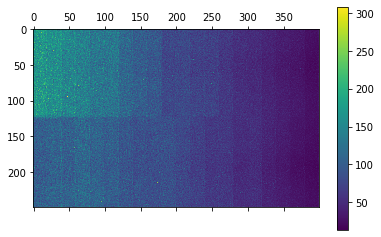

In [3]:
tm0 = time.monotonic()
run_dark = RunDirectory(rundir_dark)
images_dark = run_dark[cam_source, "data.image.pixels"].ndarray()
ntrain, npulse, ny, nx = images_dark.shape
tm_rd = time.monotonic() - tm0

tm0 = time.monotonic()
dark = process_dark(images_dark)
tm_cm = time.monotonic() - tm0

print(f"N image: {ntrain * npulse} (ntrain: {ntrain}, npulse: {npulse})")
print(f"Image size: {ny} x {nx} px")
print(f"Read time: {tm_rd:.2f} s, comp time: {tm_cm:.2f}")

im = plt.matshow(dark)
plt.colorbar(im)
plt.show()

N image: 11904 (ntrain: 93, npulse: 128)
Image size: 250 x 400 px
Read time: 4.17 s, comp time: 32.20


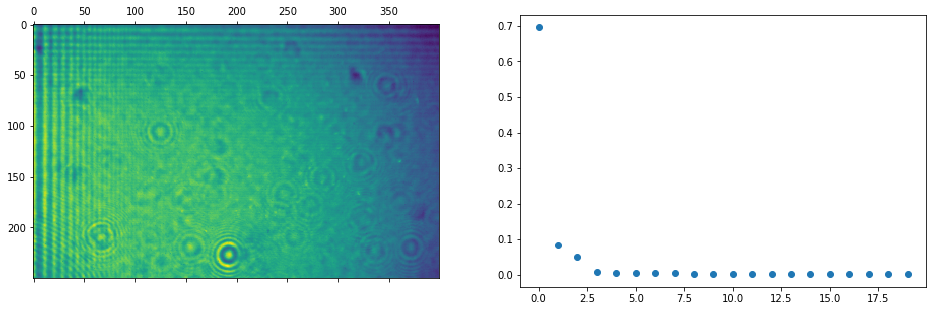

In [4]:
tm0 = time.monotonic()
run_flat = RunDirectory(rundir_flat)
images_flat = run_flat[cam_source, "data.image.pixels"].ndarray()
ntrain, npulse, ny, nx = images_flat.shape
tm_rd = time.monotonic() - tm0

tm0 = time.monotonic()
flat, components, explained_variance_ratio = process_flat_orig(
    images_flat, n_components)
tm_cm = time.monotonic() - tm0

print(f"N image: {ntrain * npulse} (ntrain: {ntrain}, npulse: {npulse})")
print(f"Image size: {ny} x {nx} px")
print(f"Read time: {tm_rd:.2f} s, comp time: {tm_cm:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.matshow(flat)
ax2.plot(explained_variance_ratio, 'o')
plt.show()

In [5]:
fn = f"pca_cam{camno}_d{runno_dark}_f{runno_flat}_r{n_components}_orig.h5"
write_constants(fn, cam_source, dark, flat, components, explained_variance_ratio)

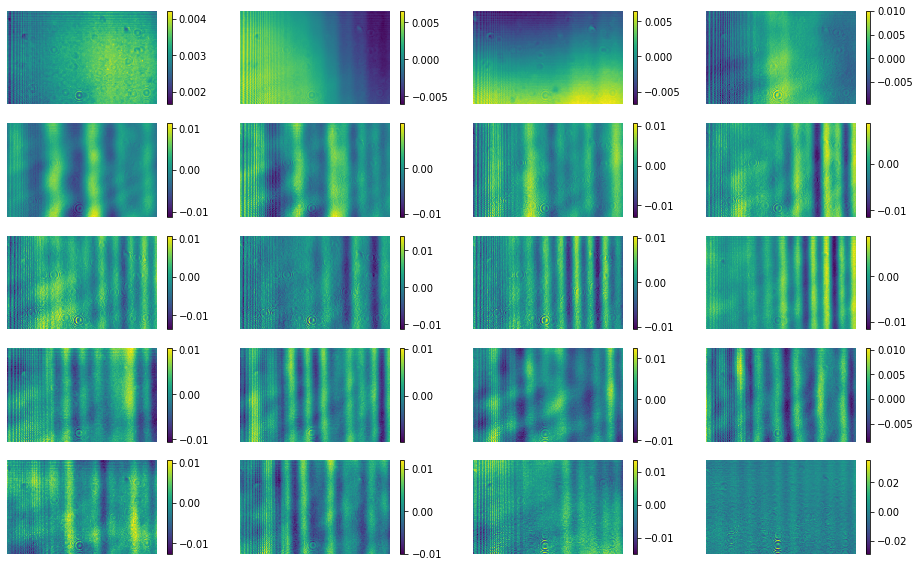

[ 3.14269075e-03  2.33108557e-04 -9.16800790e-05 -1.38638636e-04
 -6.10368253e-06 -5.84205065e-05  5.16174464e-05  1.84667644e-05
 -1.90042700e-05 -2.74161639e-05 -1.49471009e-05  2.00396133e-05
  1.01588868e-05  1.42610680e-05 -1.31820744e-05 -1.16368901e-05
 -4.37665832e-05  4.15296543e-06 -2.06623367e-06  1.55830435e-05]
[0.00035142 0.00315367 0.00316095 0.00315924 0.00316227 0.00316174
 0.00316186 0.00316222 0.00316222 0.00316216 0.00316224 0.00316221
 0.00316226 0.00316225 0.00316225 0.00316226 0.00316197 0.00316227
 0.00316228 0.00316224]


In [6]:
plot_images(components[:20])
plt.show()
print(np.mean(components, axis=(1,2)))
print(np.std(components, axis=(1,2)))

N image: 11904 (ntrain: 93, npulse: 128)
Image size: 250 x 400 px
Read time: 4.17 s, comp time: 38.33


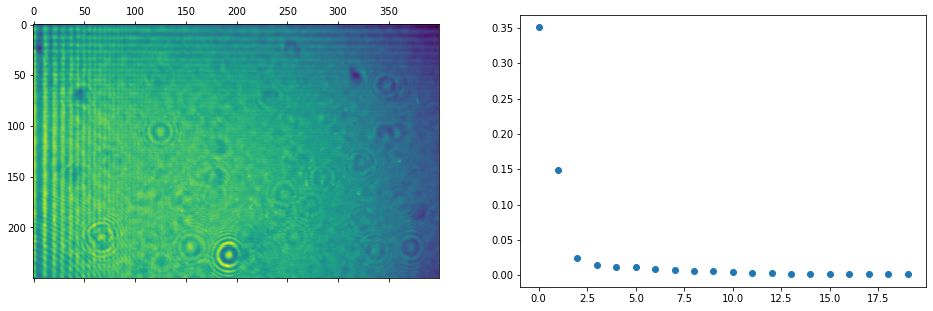

In [7]:
tm0 = time.monotonic()
flat, components, explained_variance_ratio = process_flat(images_flat, dark)
tm_cm = time.monotonic() - tm0

print(f"N image: {ntrain * npulse} (ntrain: {ntrain}, npulse: {npulse})")
print(f"Image size: {ny} x {nx} px")
print(f"Read time: {tm_rd:.2f} s, comp time: {tm_cm:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.matshow(flat)
ax2.plot(explained_variance_ratio, 'o')
plt.show()

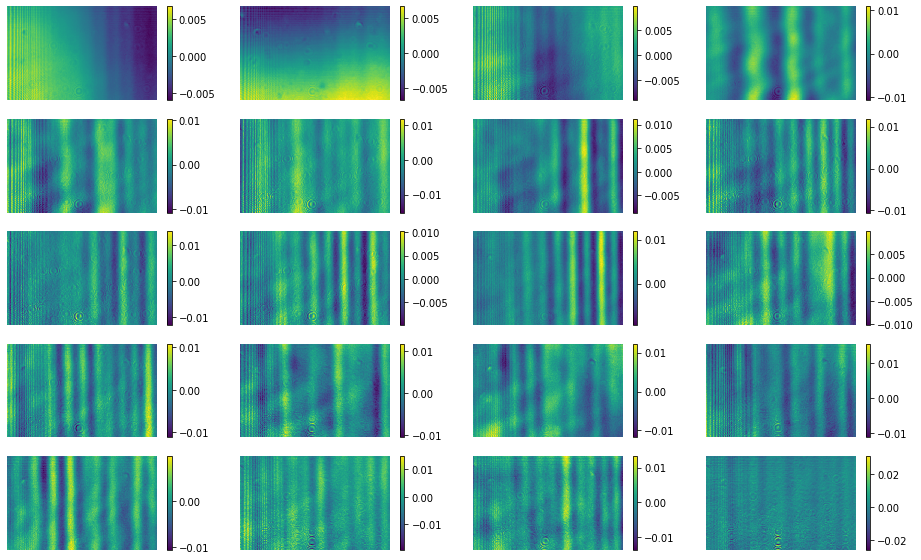

[ 1.30602560e-18  9.47292592e-18 -9.50953725e-20  6.80232780e-19
  5.10297100e-19 -2.90954869e-19  1.48518350e-18 -1.27104056e-18
  1.03023059e-19 -1.61281145e-18  1.29966350e-18 -3.34782549e-18
  2.37994520e-18 -3.68157328e-18 -1.01492426e-17 -1.28345685e-17
 -1.15368218e-18 -7.22783812e-18  1.45333398e-18 -1.16386935e-19]
[0.00316228 0.00316228 0.00316228 0.00316228 0.00316228 0.00316228
 0.00316228 0.00316228 0.00316228 0.00316228 0.00316228 0.00316228
 0.00316228 0.00316228 0.00316228 0.00316228 0.00316228 0.00316228
 0.00316228 0.00316228]


In [8]:
plot_images(components[:20])
plt.show()
print(np.mean(components, axis=(1,2)))
print(np.std(components, axis=(1,2)))

In [9]:
fn = f"pca_cam{camno}_d{runno_dark}_f{runno_flat}_r{n_components}.h5"
write_constants(fn, cam_source, dark, flat, components, explained_variance_ratio)

N image: 11904 (ntrain: 93, npulse: 128)
Image size: 400 x 250 px
Read time: 4.17 s, comp time: 46.95


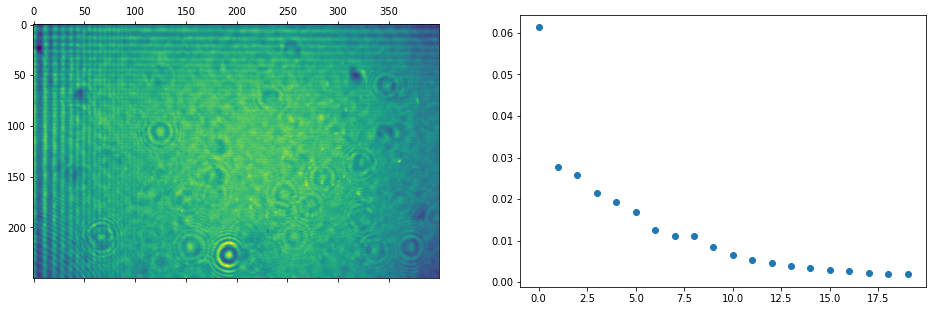

In [10]:
tm0 = time.monotonic()
flat, components, explained_variance_ratio = process_flat_linear(images_flat, dark, n_components)
tm_cm = time.monotonic() - tm0

print(f"N image: {ntrain * npulse} (ntrain: {ntrain}, npulse: {npulse})")
print(f"Image size: {nx} x {ny} px")
print(f"Read time: {tm_rd:.2f} s, comp time: {tm_cm:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.matshow(flat)
ax2.plot(explained_variance_ratio, 'o')
plt.show()

In [11]:
fn = f"pca_cam{camno}_d{runno_dark}_f{runno_flat}_r{n_components}_linear.h5"
write_constants(fn, cam_source, dark, flat, components, explained_variance_ratio)

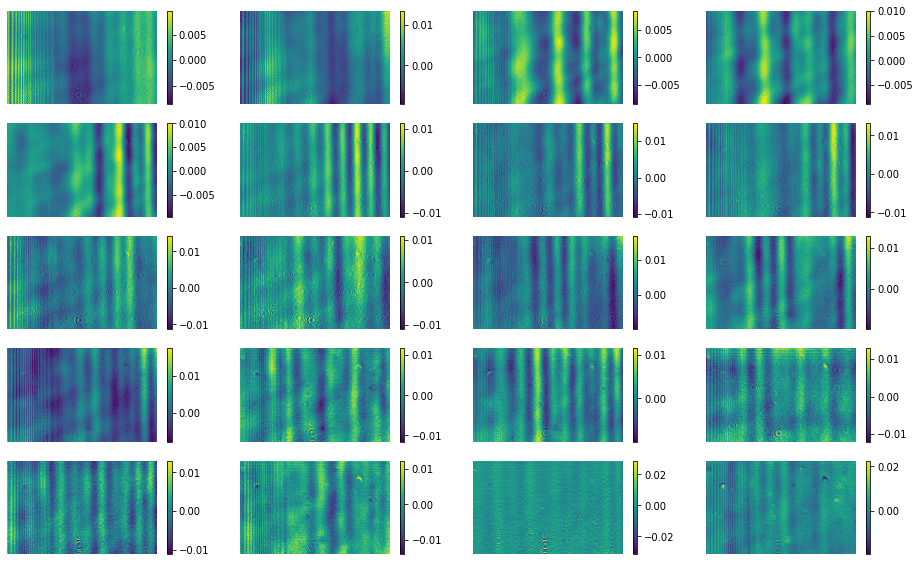

[ 6.31930394e-05 -2.20386311e-05  3.25022615e-07  2.85613797e-05
  1.99301489e-05  2.34677122e-05  9.45093075e-06 -2.61484858e-05
  4.08558088e-05 -3.77712191e-05  6.23224246e-05  6.43084908e-05
  8.46338517e-05 -8.55781018e-06  2.13402066e-05  2.90402049e-05
 -1.19769162e-04  2.55914128e-05 -3.85069993e-05  1.64637748e-04]
[0.00316165 0.0031622  0.00316228 0.00316215 0.00316221 0.00316219
 0.00316226 0.00316217 0.00316201 0.00316205 0.00316166 0.00316162
 0.00316114 0.00316227 0.00316221 0.00316214 0.00316001 0.00316217
 0.00316204 0.00315799]


In [12]:
plot_images(components[:20])
plt.show()
print(np.mean(components, axis=(1,2)))
print(np.std(components, axis=(1,2)))

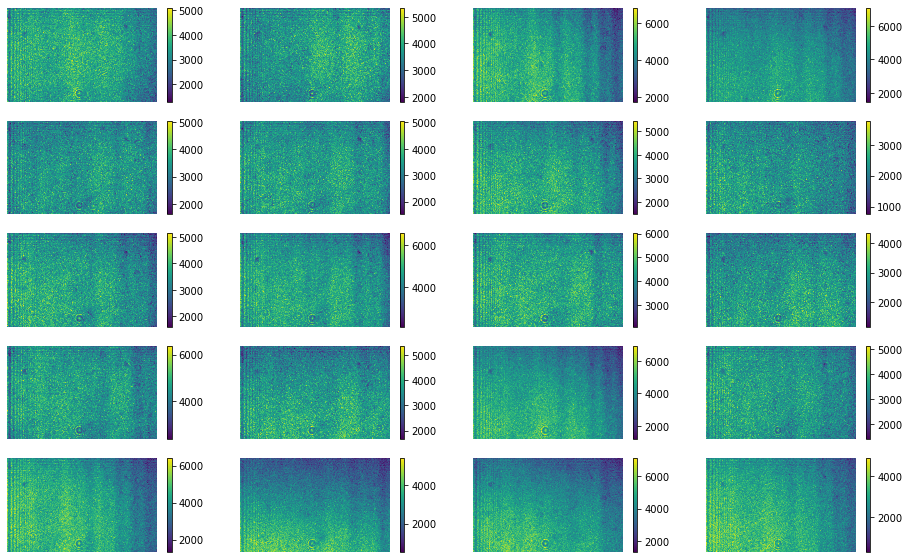

In [13]:
plot_images((images_flat - dark).reshape(-1, ny, nx)[5:128*20+5:128])
plt.show()